<h1> Modeling </h1>

<h2> Read Data In </h2>

In [55]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import accuracy_score
import pyarrow.parquet as pq
import pyarrow as pa
import numpy as np
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [56]:
filenamekillings = "/data/skariyadan/DaskKillings.parquet"
filenameincome = "/data/skariyadan/Income.parquet"
filenamebelowpoverty = "/data/skariyadan/BelowPoverty.parquet"
filenameeducation = "/data/skariyadan/Education.parquet"
filenameracestats = "/data/skariyadan/RaceStats.parquet"

In [57]:
Killings = pq.read_table(filenamekillings).to_pandas()
Killings.head()

,name,date,cause_of_death,armed,age,gender,race,city,state,mental_illness,threat_level,flee,body_camera
0,Tim Elliot,2015-01-02,shot,gun,53.0,M,asian,shelton,WA,True,attack,not fleeing,False
1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,white,aloha,OR,False,attack,not fleeing,False
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,hispanic,wichita,KS,False,other,not fleeing,False
3,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,white,san francisco,CA,True,attack,not fleeing,False
4,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,hispanic,evans,CO,False,attack,not fleeing,False


In [58]:
Income = pq.read_table(filenameincome).to_pandas()
Income.head()

,state,city,median_income
0,AL,abanda,11207
1,AL,abbeville,25615
2,AL,adamsville,42575
3,AL,addison,37083
4,AL,akron,21667


In [59]:
BelowPoverty = pq.read_table(filenamebelowpoverty).to_pandas()
BelowPoverty.head()

,state,city,poverty_rate
0,AL,abanda,78.800003
1,AL,abbeville,29.100000
2,AL,adamsville,25.500000
3,AL,addison,30.700001
4,AL,akron,42.000000


In [60]:
Education = pq.read_table(filenameeducation).to_pandas()
Education.head()

,state,city,completed_hs
0,AL,abanda,21.200001
1,AL,abbeville,69.099998
2,AL,adamsville,78.900002
3,AL,addison,81.400002
4,AL,akron,68.599998


In [61]:
RaceStats = pq.read_table(filenameracestats).to_pandas()
RaceStats.head()

,state,city,white,black,native_american,asian,hispanic
0,AL,abanda,67.199997,30.200001,0.0,0.0,1.6
1,AL,abbeville,54.400002,41.400002,0.1,1.0,3.1
2,AL,adamsville,52.299999,44.900002,0.5,0.3,2.3
3,AL,addison,99.099998,0.100000,0.0,0.1,0.4
4,AL,akron,13.200000,86.500000,0.0,0.0,0.3


<h2> Bootstrapping </h2>

We will now bootstrap the means of the ages of all victims of police shootings.

In [62]:
age = Killings.age
bootstrap = np.array([])

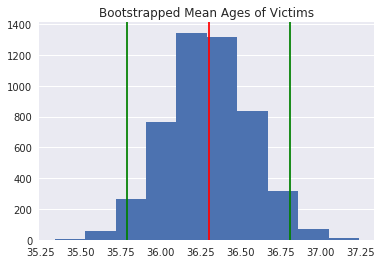

In [63]:
for i in range(5000):
    bstrap = np.random.choice(age,size = age.shape[0])
    bootstrap = np.append(bootstrap,bstrap.mean())
confidence = np.percentile(bootstrap,(2.5,97.5))
plt.hist(bootstrap)
plt.axvline(x = age.mean(),color = "red")
plt.axvline(x = confidence[0],color = "green")
plt.axvline(x = confidence[1],color = "green")
plt.grid(axis = "x")
plt.title("Bootstrapped Mean Ages of Victims")
plt.show()

In [64]:
print("Bootstrapped mean of age of all victims is "+str(bootstrap.mean())+" with a 95% confidence interval between "+str(confidence[0])+" and "+str(confidence[1]))

Bootstrapped mean of age of all victims is 36.29885168909474 with a 95% confidence interval between 35.78741770287845 and 36.80940011857324


We will now find the bootstrapped means and confidence intervals for all the ages divided by race.

In [65]:
asian = Killings.loc[Killings.race == "asian"]
black = Killings.loc[Killings.race == "black"]
native = Killings.loc[Killings.race == "native"]
white = Killings.loc[Killings.race == "white"]
hispanic = Killings.loc[Killings.race == "hispanic"]
asian = asian.age
black = black.age
native = native.age
white = white.age
hispanic = hispanic.age

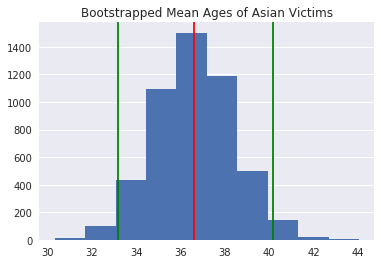

In [66]:
bootstrap = np.array([])
for i in range(5000):
    bstrap = np.random.choice(asian,size = asian.shape[0])
    bootstrap = np.append(bootstrap,bstrap.mean())
confidence = np.percentile(bootstrap,(2.5,97.5))
plt.hist(bootstrap)
plt.axvline(x = asian.mean(),color = "red")
plt.axvline(x = confidence[0],color = "green")
plt.axvline(x = confidence[1],color = "green")
plt.grid(axis = "x")
plt.title("Bootstrapped Mean Ages of Asian Victims")
plt.show()

In [67]:
print("Bootstrapped mean of age of Asian victims is "+str(bootstrap.mean())+" with a 95% confidence interval between "+str(confidence[0])+" and "+str(confidence[1]))

Bootstrapped mean of age of Asian victims is 36.61692441217584 with a 95% confidence interval between 33.204875237320316 and 40.185143748304846


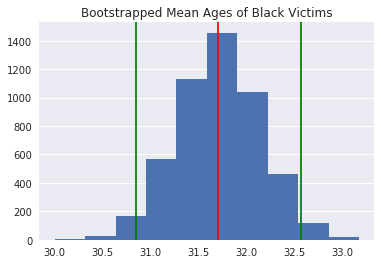

In [68]:
bootstrap = np.array([])
for i in range(5000):
    bstrap = np.random.choice(black,size = black.shape[0])
    bootstrap = np.append(bootstrap,bstrap.mean())
confidence = np.percentile(bootstrap,(2.5,97.5))
plt.hist(bootstrap)
plt.axvline(x = black.mean(),color = "red")
plt.axvline(x = confidence[0],color = "green")
plt.axvline(x = confidence[1],color = "green")
plt.grid(axis = "x")
plt.title("Bootstrapped Mean Ages of Black Victims")
plt.show()

In [69]:
print("Bootstrapped mean of age of Black victims is "+str(bootstrap.mean())+" with a 95% confidence interval between "+str(confidence[0])+" and "+str(confidence[1]))

Bootstrapped mean of age of Black victims is 31.716971694565796 with a 95% confidence interval between 30.85731805661982 and 32.566410979537125


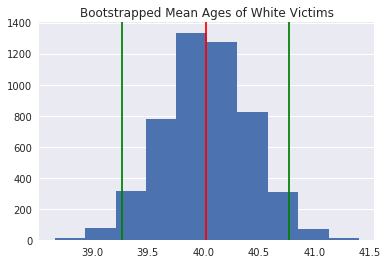

In [70]:
bootstrap = np.array([])
for i in range(5000):
    bstrap = np.random.choice(white,size = white.shape[0])
    bootstrap = np.append(bootstrap,bstrap.mean())
confidence = np.percentile(bootstrap,(2.5,97.5))
plt.hist(bootstrap)
plt.axvline(x = white.mean(),color = "red")
plt.axvline(x = confidence[0],color = "green")
plt.axvline(x = confidence[1],color = "green")
plt.grid(axis = "x")
plt.title("Bootstrapped Mean Ages of White Victims")
plt.show()

In [71]:
print("Bootstrapped mean of age of White victims is "+str(bootstrap.mean())+" with a 95% confidence interval between "+str(confidence[0])+" and "+str(confidence[1]))

Bootstrapped mean of age of White victims is 40.02811897123973 with a 95% confidence interval between 39.27046885596422 and 40.77144630965923


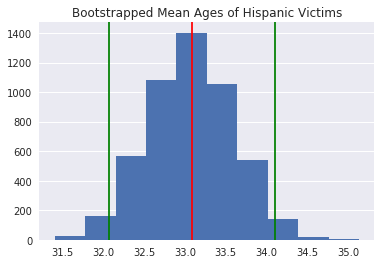

In [72]:
bootstrap = np.array([])
for i in range(5000):
    bstrap = np.random.choice(hispanic,size = hispanic.shape[0])
    bootstrap = np.append(bootstrap,bstrap.mean())
confidence = np.percentile(bootstrap,(2.5,97.5))
plt.hist(bootstrap)
plt.axvline(x = hispanic.mean(),color = "red")
plt.axvline(x = confidence[0],color = "green")
plt.axvline(x = confidence[1],color = "green")
plt.grid(axis = "x")
plt.title("Bootstrapped Mean Ages of Hispanic Victims")
plt.show()

In [73]:
print("Bootstrapped mean of age of Hispanic victims is "+str(bootstrap.mean())+" with a 95% confidence interval between "+str(confidence[0])+" and "+str(confidence[1]))

Bootstrapped mean of age of Hispanic victims is 33.07438945384108 with a 95% confidence interval between 32.076761027339685 and 34.097988187363306


<h2> Logistic Regression </h2>

To predict the value of a categorical outcome, logistic regression is used. In this case we will be using logistic regression to predict the race of the victims.

First, we must combine all our numerical data together.

In [74]:
data = pd.merge(Killings,Income, on = ["state","city"], how = 'inner')
data = pd.merge(data, BelowPoverty, on = ["state","city"], how = 'inner')
data = pd.merge(data, Education, on = ["state","city"], how = 'inner')
data = pd.merge(data, RaceStats, on = ["state","city"], how = 'inner')
data = data.dropna()

In [75]:
data.head()

,name,date,cause_of_death,armed,age,gender,race,city,state,mental_illness,...,flee,body_camera,median_income,poverty_rate,completed_hs,white,black,native_american,asian,hispanic
0,Tim Elliot,2015-01-02,shot,gun,53.0,M,asian,shelton,WA,True,...,not fleeing,False,37072,28.600000,80.099998,78.900002,0.8,3.7,1.1,19.200001
1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,white,aloha,OR,False,...,not fleeing,False,65765,14.900000,88.099998,70.900002,2.6,1.0,8.9,21.100000
2,Phyllis Ilene Jepsen,2015-10-02,shot,knife,55.0,F,white,aloha,OR,True,...,not fleeing,False,65765,14.900000,88.099998,70.900002,2.6,1.0,8.9,21.100000
3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,hispanic,wichita,KS,False,...,not fleeing,False,45947,17.299999,87.500000,71.900002,11.5,1.2,4.8,15.300000
4,Nicholas Garner,2015-08-22,shot,vehicle,26.0,M,white,wichita,KS,False,...,car,False,45947,17.299999,87.500000,71.900002,11.5,1.2,4.8,15.300000


Now, we must create dummy variables (a numerical variable used in regression analysis to represent the subgroups of the sample). We concatenate the above data with the dummy variables, and we drop all the categorical columns (not including race)

In [76]:
dummies = pd.get_dummies(data[["armed", "gender", "city", "state", "threat_level", "flee","mental_illness", "body_camera"]], drop_first=True)
dummies = pd.concat([data, dummies], axis=1)
dummies.drop(data[["date", "armed", "gender", "city", "state", "threat_level", "flee","mental_illness", "body_camera","cause_of_death","name"]], axis=1, inplace=True)
dummies.dropna()
dummies.head()

,age,race,median_income,poverty_rate,completed_hs,white,black,native_american,asian,hispanic,...,state_WA,state_WI,state_WV,state_WY,threat_level_other,threat_level_undetermined,flee_foot,flee_not fleeing,flee_other,flee_unknown
0,53.0,asian,37072,28.600000,80.099998,78.900002,0.8,3.7,1.1,19.200001,...,1,0,0,0,0,0,0,1,0,0
1,47.0,white,65765,14.900000,88.099998,70.900002,2.6,1.0,8.9,21.100000,...,0,0,0,0,0,0,0,1,0,0
2,55.0,white,65765,14.900000,88.099998,70.900002,2.6,1.0,8.9,21.100000,...,0,0,0,0,1,0,0,1,0,0
3,23.0,hispanic,45947,17.299999,87.500000,71.900002,11.5,1.2,4.8,15.300000,...,0,0,0,0,1,0,0,1,0,0
4,26.0,white,45947,17.299999,87.500000,71.900002,11.5,1.2,4.8,15.300000,...,0,0,0,0,0,0,0,0,0,0


X will be all the variables except race, and y will be race. We will be seeing how well all the combined variables in this data set will allow for us to predict race. We will test and train the data and fit it onto a LogisticRegression model.

In [77]:
X = dummies.drop("race", axis=1)
y = dummies["race"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Using the logistic model, we will now predict the values based on the test values. After we print a classification report to determine how precise the y_test values were to the predictions.

In [78]:
predictions = logmodel.predict(X_test)
print (classification_report(y_test, predictions))

                precision    recall  f1-score   support

         asian       0.50      0.11      0.18         9
         black       0.64      0.53      0.58       165
      hispanic       0.57      0.52      0.54       130
nativeamerican       0.00      0.00      0.00        16
         other       0.67      0.29      0.40         7
         white       0.68      0.82      0.74       313

   avg / total       0.63      0.65      0.63       640



We can see that the predictions were roughly 63% precise.

We will now check the accuracy score below.

In [79]:
log_accuracy_score = accuracy_score(y_test, predictions)
log_accuracy_score

0.646875

We will now apply GridSearch to the Logistic Regression model. We create the GridSearchCV with 5 fold cross validation. We then fit the GridSearch model onto the X_train and y_train model from before.

In [80]:
params = {"max_iter": [20,30,50],
         "C": [1.0, 2.0, 3.0]}
gs_logmodel = model_selection.GridSearchCV(estimator=logmodel,
                                 param_grid=params,
                                 cv=5,
                                 scoring="accuracy")
gs_logmodel.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_iter': [20, 30, 50], 'C': [1.0, 2.0, 3.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [81]:
gs_logmodel.best_params_

{'C': 1.0, 'max_iter': 20}

We get the accuracacy score of this model, regarding how much the predicted labels match the predicted labels.

In [82]:
gs_logmodel_accuracy_score = gs_logmodel.best_score_
gs_logmodel_accuracy_score

0.6720321931589537

The confusion matrix of predicted label vs true label.

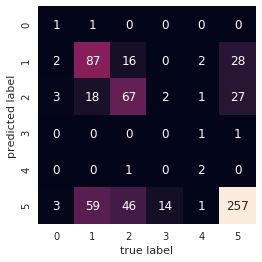

In [83]:
mat = confusion_matrix(y_test, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

The model was roughly 67.203% accurate.

<h2> Random Forest Classifier </h2>

Random Forests are an ensemble learning methond for classification. It operates by creating several decision trees while training and outputs the class that is the mode of the classes. We will use this model to predict race.

In [84]:
data.head()

,name,date,cause_of_death,armed,age,gender,race,city,state,mental_illness,...,flee,body_camera,median_income,poverty_rate,completed_hs,white,black,native_american,asian,hispanic
0,Tim Elliot,2015-01-02,shot,gun,53.0,M,asian,shelton,WA,True,...,not fleeing,False,37072,28.600000,80.099998,78.900002,0.8,3.7,1.1,19.200001
1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,white,aloha,OR,False,...,not fleeing,False,65765,14.900000,88.099998,70.900002,2.6,1.0,8.9,21.100000
2,Phyllis Ilene Jepsen,2015-10-02,shot,knife,55.0,F,white,aloha,OR,True,...,not fleeing,False,65765,14.900000,88.099998,70.900002,2.6,1.0,8.9,21.100000
3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,hispanic,wichita,KS,False,...,not fleeing,False,45947,17.299999,87.500000,71.900002,11.5,1.2,4.8,15.300000
4,Nicholas Garner,2015-08-22,shot,vehicle,26.0,M,white,wichita,KS,False,...,car,False,45947,17.299999,87.500000,71.900002,11.5,1.2,4.8,15.300000


We must convert the columns of boolean variables to integers. In addition, we must drop variables that will not help with the training.

In [85]:
data["mental_illness"] = data["mental_illness"].astype(int)
data["body_camera"] = data["body_camera"].astype(int)
data = data.drop(data[["name","cause_of_death"]],axis = 1)

LabelEncoder is a method of preprocessing to transform categorical labels to numerical labels.

In [86]:
le = LabelEncoder()
le.fit(["armed", "race", "gender", "city", "state", "threat_level", "flee"])

LabelEncoder()

Our y (which we hope to predict) will be race, and X will be everything else except race, as we hope to use the variables to predict race. We train and test the data.

In [87]:
data_log = data.apply(LabelEncoder().fit_transform)

X = data_log
y = data_log["race"]
X.drop(["race", "date"], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

We fit the X_train and y_train values onto the RandomForestClassifier.

In [88]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Feature importances will let us know which feature is the most important in determining splits in the decision trees that comprise Random Forest.

Below we can see the racial statistics features and the age feature are the most important in determining race.

In [89]:
rfc_pred = rfc.predict(X_test)
feature_data = pd.DataFrame({"feature_name": data_log.columns, "feature_importance": rfc.feature_importances_})
feature_data

,feature_importance,feature_name
0,0.042568,armed
1,0.136596,age
2,0.005518,gender
3,0.047540,city
4,0.033194,state
5,0.024145,mental_illness
6,0.027528,threat_level
7,0.038841,flee
8,0.012279,body_camera
9,0.045418,median_income


The classification report will allow for us to see how precise the model was with respect to the test values and the predicted values.

In [90]:
print(classification_report(y_test, rfc_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         9
          1       0.63      0.61      0.62       165
          2       0.59      0.58      0.58       130
          3       1.00      0.06      0.12        16
          4       0.33      0.29      0.31         7
          5       0.71      0.77      0.74       313

avg / total       0.66      0.66      0.65       640



The model was roughly 62% precise.

In [91]:
rf_accuracy_score = accuracy_score(y_test, rfc_pred)
rf_accuracy_score

0.65625

The model was rougly 63.59% accurate.

We will now apply GridSearch to the Random Classifier model. We create the GridSearchCV with 5 fold cross validation. We then fit the GridSearch model onto the X_train and y_train model from before.

In [92]:
params = {"max_depth": [32,44,50],
         "n_estimators": [15,18,26,32],
          "min_samples_leaf": [40,50,60],
         "criterion": ["gini", "entropy"]}

from sklearn import model_selection

gs_rf = model_selection.GridSearchCV(estimator=rfc,
                                 param_grid=params,
                                 cv=5,
                                 scoring="accuracy")

gs_rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [32, 44, 50], 'n_estimators': [15, 18, 26, 32], 'min_samples_leaf': [40, 50, 60], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [93]:
gs_rf.best_params_

{'criterion': 'gini',
 'max_depth': 44,
 'min_samples_leaf': 40,
 'n_estimators': 26}

We get the accuracacy score of this model, regarding how much the predicted labels match the predicted labels.

In [94]:
gs_rf_accuracy_score = gs_rf.best_score_ 
gs_rf_accuracy_score

0.6659959758551308

The Confusion Matrix of predicted label vs true label.

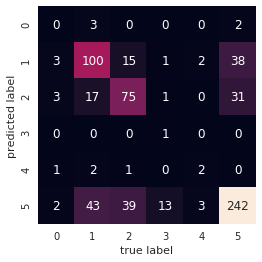

In [95]:
mat = confusion_matrix(y_test, rfc_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

The model was roughly 66.599% accurate.

Logistic Regression turned out to be more accurate in this case, however, overall the accuracy would be improved with more data, as the dataset only goes back 2 years. What was most important for determining race was age, which makes sense since there is a significant difference between the mean ages between races. In addition, race statistics followed by median_income and education level were important features in determining race.

References used: Kaggle Discussion Forum to help understand the regression and machine learning models 